# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T
X

array([[   1,    1,  500,    1],
       [   1,    1,  700,    1],
       [   1,    2,  750,    2],
       [   1,    1,  600,    1],
       [   1,    3, 1450,    2],
       [   1,    0,  800,    1],
       [   1,    5, 1500,    3],
       [   1,   10, 2000,    3],
       [   1,    1,  450,    1],
       [   1,    2, 1000,    2]])

In [28]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape, y

((10,), array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60]))

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [5]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [7]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

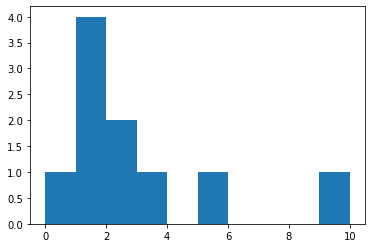

In [9]:
plt.hist(X[:,1]);

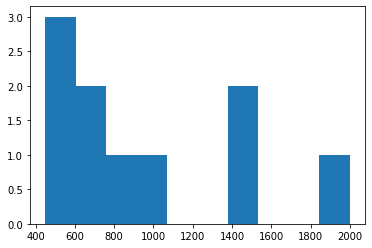

In [10]:
plt.hist(X[:,2]);

In [11]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [12]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

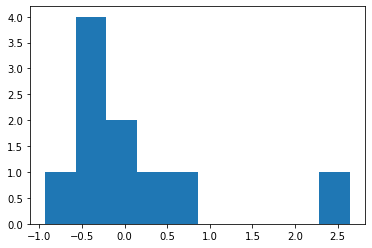

In [15]:
plt.hist(X_st[:,1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [18]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

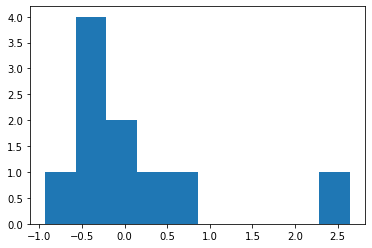

In [19]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 104.25270133807832, веса: [49.59793486  4.02918759  4.08963433  3.47851917]
# итерация: 200, MSE: 41.64691159665189, веса: [56.36529359  4.41634225  3.6658251   3.55630913]
# итерация: 300, MSE: 40.319614083283895, веса: [57.26277769  4.7218775   3.30067422  3.62060602]
# итерация: 400, MSE: 40.140121772723, веса: [57.38180164  4.97104627  2.99477749  3.6811839 ]
# итерация: 500, MSE: 40.028984565738305, веса: [57.39758654  5.17464147  2.73862542  3.73698596]
# итерация: 600, MSE: 39.95224589352006, веса: [57.39967993  5.3412826   2.52418711  3.78751613]
# итерация: 700, MSE: 39.89903836881249, веса: [57.39995755  5.47789582  2.3447135   3.83267613]
# итерация: 800, MSE: 39.86210551926729, веса: [57.39999437  5.59006023  2.19453653  3.87262212]
# итерация: 900, MSE: 39.83644752822442, веса: [57.39999925  5.68228045  2.06889878  3.9076641 ]
# итерация: 1000, MSE: 39.8186099581955, веса: [57.3999999   5.7582018   1.96380917  3.93819632]


array([57.3999999 ,  5.7582018 ,  1.96380917,  3.93819632])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 39.6021113398032, веса: [57.39600208  5.60706058  2.01877752  4.05943068]
# итерация: 1000, MSE: 38.89392612109409, веса: [57.39801686  5.95112798  1.66715074  4.06961629]
# итерация: 1500, MSE: 38.54845104262448, веса: [57.39787659  6.0715836   1.52160304  4.09598623]
# итерация: 2000, MSE: 38.393342192404035, веса: [57.39782353  6.11580027  1.46184875  4.11209142]
# итерация: 2500, MSE: 38.32660620752437, веса: [57.39780294  6.13260806  1.43743436  4.11994024]
# итерация: 3000, MSE: 38.298582785124076, веса: [57.39779482  6.13915211  1.4274874   4.12344434]
# итерация: 3500, MSE: 38.28697959047908, веса: [57.39779158  6.14174025  1.4234416   4.12494375]
# итерация: 4000, MSE: 38.282214663232345, веса: [57.39779028  6.14277403  1.42179769  4.125571  ]
# итерация: 4500, MSE: 38.28026742938799, веса: [57.39778975  6.14318951  1.42113012  4.12583008]
# итерация: 5000, MSE: 38.279473978310165, веса: [57.39778954  6.14335711  1.42085912  4.12593631]


array([57.39778954,  6.14335711,  1.42085912,  4.12593631])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [32]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-5)

# итерация: 500, MSE: 39.98155930300685, веса: [57.39737873  5.10791641  2.46015844  4.08691915]
# итерация: 1000, MSE: 39.80713269084298, веса: [57.39971291  5.7664642   1.85628994  4.03912497]
# итерация: 1500, MSE: 39.782346337682085, веса: [57.399713    5.99144378  1.60442371  4.06909626]
# итерация: 2000, MSE: 39.77849174531259, веса: [57.399713    6.07247788  1.5005237   4.0932851 ]
# итерация: 2500, MSE: 39.77786892689035, веса: [57.399713    6.10287267  1.45793539  4.10603298]
# итерация: 3000, MSE: 39.77776660979388, веса: [57.399713    6.11460469  1.44054386  4.1119218 ]
# итерация: 3500, MSE: 39.77774961326131, веса: [57.399713    6.1192204   1.43345753  4.11448655]
# итерация: 4000, MSE: 39.77774674405675, веса: [57.399713    6.12105871  1.43057395  4.11557029]
# итерация: 4500, MSE: 39.77774624311108, веса: [57.399713    6.12179647  1.42940149  4.11602068]
# итерация: 5000, MSE: 39.77774614918459, веса: [57.399713    6.12209394  1.42892499  4.11620609]


array([57.399713  ,  6.12209394,  1.42892499,  4.11620609])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

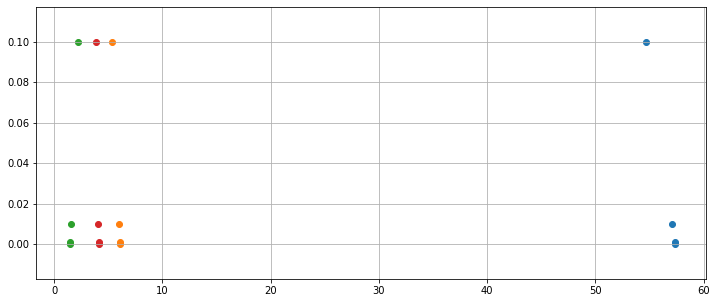

In [73]:
#Слабовато видно, но ясно, что один вес с уменьшением lambda падает, а остальные растут.

lambdas = np.array([1e-1, 1e-2, 1e-3, 1e-4])
weights = np.array([[54.66666667,  5.3118901 ,  2.25660813,  3.88109191],
                   [57.11442786,  6.0088442 ,  1.55430443,  4.08144793],
                   [57.37131434,  6.11038803,  1.44200443,  4.11257825],
                   [57.39713014,  6.12102515,  1.4301203 ,  4.11587451]])
plt.figure(figsize=(12, 5))
plt.scatter(weights[:, 0], lambdas)
plt.scatter(weights[:, 1], lambdas)
plt.scatter(weights[:, 2], lambdas)
plt.scatter(weights[:, 3], lambdas)
plt.grid()
plt.show()



Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нельзя, так как это два разных метода масштабирования принаков.

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [77]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [78]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-5)

# итерация: 500, MSE: 39.98154857614476, веса: [57.3976606   5.10794092  2.46013302  4.08693606]
# итерация: 1000, MSE: 39.80712262269251, веса: [57.3999949   5.7665295   1.85622181  4.03914431]
# итерация: 1500, MSE: 39.78234067888447, веса: [57.399995    5.99153477  1.60432529  4.06912059]
# итерация: 2000, MSE: 39.778489068823085, веса: [57.399995    6.07258234  1.50040761  4.09331386]
# итерация: 2500, MSE: 39.77786772265824, веса: [57.399995    6.10298374  1.45780992  4.10606463]
# итерация: 3000, MSE: 39.77776605703324, веса: [57.399995    6.1147189   1.4404137   4.11195505]
# итерация: 3500, MSE: 39.77774933550096, веса: [57.399995    6.11933608  1.4333251   4.11452063]
# итерация: 4000, MSE: 39.777746579911714, веса: [57.399995    6.12117507  1.43044046  4.11560477]
# итерация: 4500, MSE: 39.777746125447806, веса: [57.399995    6.12191314  1.4292675   4.11605535]
# итерация: 5000, MSE: 39.77774605045478, веса: [57.399995    6.12221075  1.42879078  4.11624085]


array([57.399995  ,  6.12221075,  1.42879078,  4.11624085])